## Feature Engineering 02

In [1]:
import pandas as pd
import numpy as np

In [4]:
titanic = pd.read_csv('dataset/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Binning

In [5]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
titanic.Age.min()

0.42

In [8]:
titanic.Age.max()

80.0

In [25]:
# create a new age column 
age = titanic['Age']
df = pd.DataFrame(age)

# crete data bining labels
cut_labels = ['child', 'tennage', 'young adult', 'mid_age adult', 'old']
# define cut range
cut_bins = [0, 12, 18, 35, 55, 80]

# make binning by using cut (convert numerical data to categorical data with a range)
df['Age binning'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)
df

,Age,Age binning
0,22.0,young adult
1,38.0,mid_age adult
2,26.0,young adult
3,35.0,young adult
4,35.0,young adult
...,...,...
886,27.0,young adult
887,19.0,young adult
888,NaN,NaN
889,26.0,young adult


In [26]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [40]:
cls = titanic['Pclass']

# create dataframe
df = pd.DataFrame(cls)

# one hot algorightm for categorial data to numerical data
one_hot = pd.get_dummies(df['Pclass'], prefix='Plcass').astype(int)

df = df.join(one_hot)
df

,Pclass,Plcass_1,Plcass_2,Plcass_3
0,3,0,0,1
1,1,1,0,0
2,3,0,0,1
3,1,1,0,0
4,3,0,0,1
...,...,...,...,...
886,2,0,1,0
887,1,1,0,0
888,3,0,0,1
889,1,1,0,0


# Transformation
### Normal Distrubution

In [2]:
import pandas as pd
import numpy as np

In [36]:
news = pd.read_csv('dataset/Online news/OnlineNewsPopularity.csv')
news = news[news[' n_tokens_content'] > 0]
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [20]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38463 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             38463 non-null  object 
 1    timedelta                      38463 non-null  float64
 2    n_tokens_title                 38463 non-null  float64
 3    n_tokens_content               38463 non-null  float64
 4    n_unique_tokens                38463 non-null  float64
 5    n_non_stop_words               38463 non-null  float64
 6    n_non_stop_unique_tokens       38463 non-null  float64
 7    num_hrefs                      38463 non-null  float64
 8    num_self_hrefs                 38463 non-null  float64
 9    num_imgs                       38463 non-null  float64
 10   num_videos                     38463 non-null  float64
 11   average_token_length           38463 non-null  float64
 12   num_keywords                   38463

In [21]:
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [35]:
news[' n_tokens_content'].describe(), news[' n_tokens_content'].median()

(count    38463.000000
 mean       563.295375
 std        468.299538
 min         18.000000
 25%        259.000000
 50%        423.000000
 75%        729.000000
 max       8474.000000
 Name:  n_tokens_content, dtype: float64,
 423.0)

# Transformation
### 1. Log Transformation

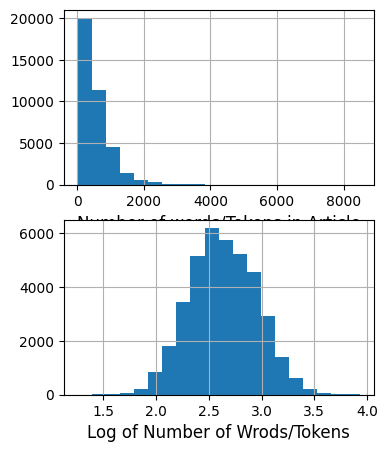

In [66]:
import matplotlib.pylab as plt

news['log_n_tokens_content'] = np.log10(news[' n_tokens_content'])

# draw figure frame
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5))
# print(fig)

ax1.set_xlabel("Number of words/Tokens in Article", fontsize=12)
ax2.set_xlabel("Log of Number of Wrods/Tokens", fontsize = 12)

# set values into graph
news[' n_tokens_content'].hist(ax=ax1, bins=20)
news['log_n_tokens_content'].hist(ax=ax2, bins=20)

plt.show()

In [67]:
news['log_n_tokens_content'].mean(), news['log_n_tokens_content'].median(), news['log_n_tokens_content'].mode()

(2.6352222475696685,
 2.6263403673750423,
 0    2.456366
 Name: log_n_tokens_content, dtype: float64)

## Box-Cox transformer

lambda:  -0.02398040597817036


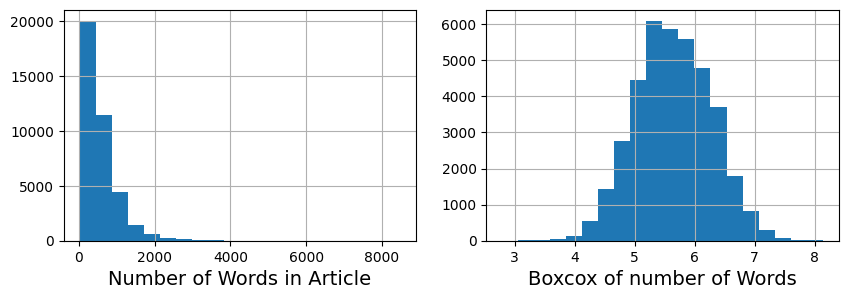

In [76]:
from scipy.stats import boxcox

y = news[' n_tokens_content']
y, fitted_lambda = boxcox(y, lmbda=None)

print("lambda: ", fitted_lambda)

news['boxcox_n_tokens_content'] = y

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))

ax1.set_xlabel("Number of Words in Article", fontsize = 14)
ax2.set_xlabel("Boxcox of number of Words", fontsize = 14)

news[' n_tokens_content'].hist(ax=ax1, bins=20)
news['boxcox_n_tokens_content'].hist(ax=ax2, bins=20)

plt.show()

In [77]:
news['boxcox_n_tokens_content'].mean(), news['boxcox_n_tokens_content'].median(), news['boxcox_n_tokens_content'].mode()

(5.641528205686787,
 5.62933162336412,
 0    5.289191
 Name: boxcox_n_tokens_content, dtype: float64)

## Yeo-Johnson Transformer

Figure(1200x300)


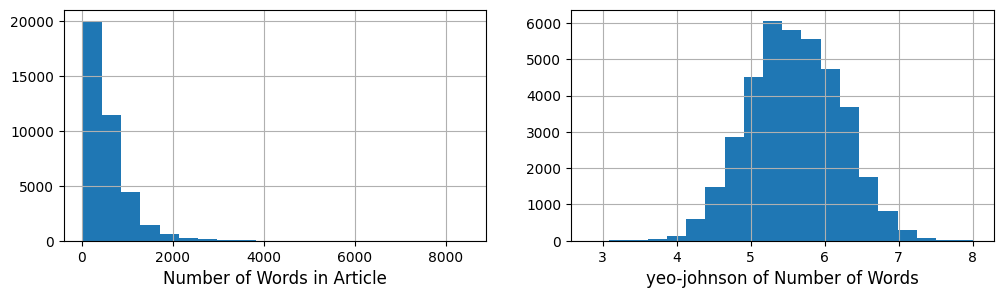

In [80]:
from scipy.stats import yeojohnson

y = news[' n_tokens_content']
y, lmbda = yeojohnson(y)
news['yeojohnson'] = y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 3))
print(fig)

ax1.set_xlabel("Number of Words in Article", fontsize = 12)
ax2.set_xlabel("yeo-johnson of Number of Words", fontsize = 12)

# show using histogram
news[' n_tokens_content'].hist(ax=ax1, bins=20)
news['yeojohnson'].hist(ax=ax2, bins=20)

plt.show()

In [81]:
lmbda

-0.027094236239032832

In [82]:
news['yeojohnson'].mean(), news['yeojohnson'].median(), news['yeojohnson'].mode()

(5.591779136084254,
 5.579934213089421,
 0    5.246925
 Name: yeojohnson, dtype: float64)

## Normalizations / Scaling

In [90]:
import pandas as pd
import sklearn.preprocessing as preproc

# Look at the original data - the number of words in an article
print("Values: ", news[' n_tokens_content'].values)

# Min-max scaling
news['minmax'] = preproc.minmax_scale(news[' n_tokens_content'])
print("\n min-max: ", news['minmax'].values)

# Standardization - note that by defination, some outputs will be negative
news['standardized'] = preproc.StandardScaler().fit_transform(news[[' n_tokens_content']])
print("\n standardized: ", news['standardized'].values)

news['l2_normalized'] = preproc.normalize(news[[' n_tokens_content']], axis=0)
print("\n l2 norm: ", news['l2_normalized'].values)

Values:  [219. 255. 211. ... 442. 682. 157.]

 min-max:  [0.0237701  0.02802744 0.02282403 ... 0.05014191 0.07852412 0.01643803]

 standardized:  [-0.73521288 -0.658338   -0.75229618 ... -0.25901574  0.25348342
 -0.86760849]

 l2 norm:  [0.00152439 0.00177498 0.00146871 ... 0.00307663 0.0047472  0.00109283]


In [91]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content,boxcox_n_tokens_content,boxcox_n_tokens_content,yeojohnson,minmax,standardized,l2_normalized
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.000000,0.187500,593,2.340444,5.055379,5.055379,5.018042,0.023770,-0.735213,0.001524
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.500000,0.000000,711,2.406540,5.188877,5.188877,5.148718,0.028027,-0.658338,0.001775
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.500000,0.000000,1500,2.324282,5.022662,5.022662,4.986020,0.022824,-0.752296,0.001469
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.500000,0.000000,1200,2.725095,5.825490,5.825490,5.771948,0.060667,-0.068964,0.003696
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.045455,0.136364,505,3.030195,6.424807,6.424807,6.358213,0.124645,1.086295,0.007462


In [92]:
news.l2_normalized.max()

0.05898497124947045

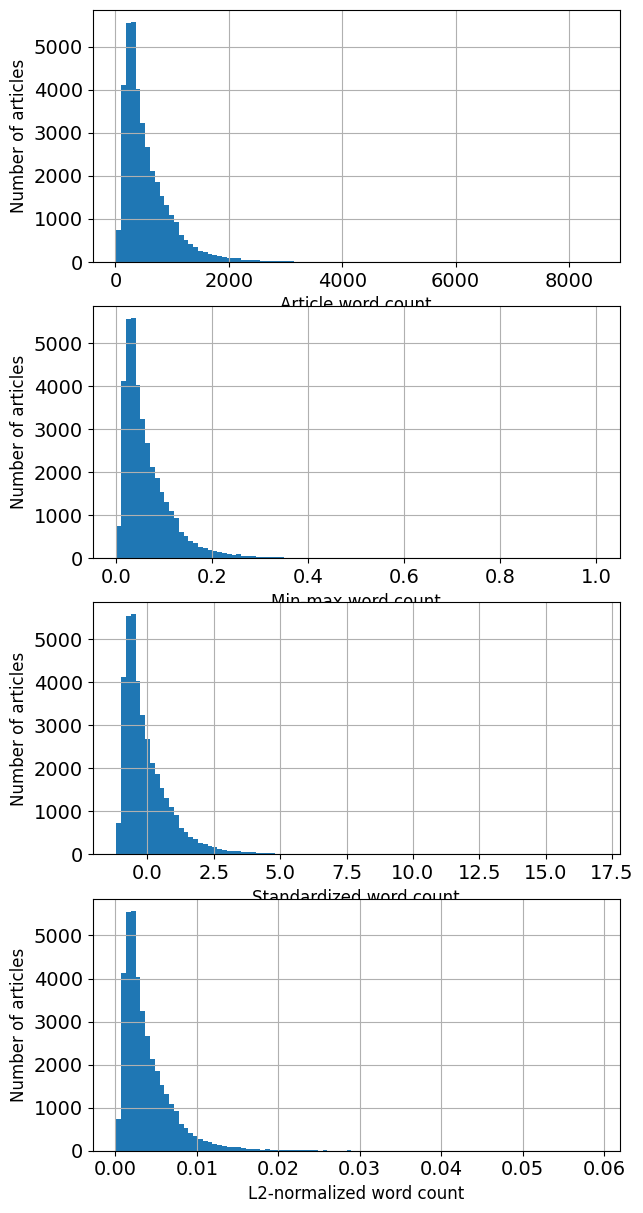

In [100]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (6, 12))
fig.tight_layout()

news[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Article word count", fontsize=12)
ax1.set_ylabel("Number of articles", fontsize=12)

news['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Min-max word count", fontsize=12)
ax2.set_ylabel("Number of articles", fontsize=12)

news['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Standardized word count", fontsize=12)
ax3.set_ylabel("Number of articles", fontsize=12)

news['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel("L2-normalized word count", fontsize=12)
ax4.set_ylabel("Number of articles", fontsize=12)

plt.show()